# <b> Data Science and Business Analytics - TSF </b>
# <b> Task 1 : Prediction using Decision Tree Algorithm </b>

### **AIM**: Create a Decision Tree Classifier and visualize it graphically
### **LANGUAGE USED** : Python 3
### **IDE** : Jupyter Notebook
### **FORM** : Linear Regression
### **AUTHOR** : Gurman Singh

## **1.** Importing Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_set = pd.read_csv("Iris.csv")
data_set.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## **2.** Exploring Data

In [3]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
data_set.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
#data cleaning is not required here since there is no duplication or missing values
data_set.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## **3.** Preparing Dataset

In [6]:
# ID column is not required So we are going to drop that from dataset
data_set.drop(columns=['Id'], inplace = True)

In [7]:
X = data_set.iloc[:,:-1].values     #Independent variable
y = data_set.iloc[:,-1].values      #Dependent Variable

print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [8]:
print(y)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

In [9]:
# splitting Training and Test data set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

print(X_train)

[[5.1 3.5 1.4 0.3]
 [4.4 3.2 1.3 0.2]
 [5.7 3.8 1.7 0.3]
 [6.3 2.5 5.  1.9]
 [5.8 2.8 5.1 2.4]
 [6.6 3.  4.4 1.4]
 [5.4 3.9 1.7 0.4]
 [5.7 4.4 1.5 0.4]
 [6.1 2.9 4.7 1.4]
 [5.8 2.7 5.1 1.9]
 [5.7 2.8 4.1 1.3]
 [7.  3.2 4.7 1.4]
 [5.2 3.5 1.5 0.2]
 [4.4 3.  1.3 0.2]
 [7.7 2.8 6.7 2. ]
 [7.7 3.8 6.7 2.2]
 [6.4 2.9 4.3 1.3]
 [6.3 2.9 5.6 1.8]
 [5.  3.5 1.3 0.3]
 [4.9 3.1 1.5 0.1]
 [6.5 3.  5.5 1.8]
 [6.  2.9 4.5 1.5]
 [5.  3.6 1.4 0.2]
 [5.5 2.3 4.  1.3]
 [5.1 3.8 1.9 0.4]
 [7.3 2.9 6.3 1.8]
 [6.4 3.1 5.5 1.8]
 [6.7 3.1 4.4 1.4]
 [6.4 2.8 5.6 2.1]
 [5.6 2.5 3.9 1.1]
 [4.6 3.2 1.4 0.2]
 [6.3 2.3 4.4 1.3]
 [5.2 4.1 1.5 0.1]
 [5.5 2.5 4.  1.3]
 [6.9 3.1 4.9 1.5]
 [4.7 3.2 1.6 0.2]
 [4.9 3.1 1.5 0.1]
 [5.9 3.  4.2 1.5]
 [4.9 3.  1.4 0.2]
 [6.  2.7 5.1 1.6]
 [4.8 3.  1.4 0.3]
 [5.5 2.6 4.4 1.2]
 [6.1 3.  4.9 1.8]
 [7.2 3.  5.8 1.6]
 [7.7 3.  6.1 2.3]
 [6.6 2.9 4.6 1.3]
 [6.3 2.7 4.9 1.8]
 [5.5 3.5 1.3 0.2]
 [5.8 2.7 5.1 1.9]
 [4.3 3.  1.1 0.1]
 [6.  2.2 4.  1. ]
 [5.1 3.8 1.6 0.2]
 [6.3 3.4 5.

In [10]:
print(X_test)

[[5.6 3.  4.1 1.3]
 [6.3 2.5 4.9 1.5]
 [5.4 3.4 1.7 0.2]
 [5.4 3.9 1.3 0.4]
 [6.5 3.  5.2 2. ]
 [6.7 3.1 5.6 2.4]
 [5.7 2.5 5.  2. ]
 [5.1 3.3 1.7 0.5]
 [4.8 3.  1.4 0.1]
 [6.2 2.2 4.5 1.5]
 [5.1 3.4 1.5 0.2]
 [7.4 2.8 6.1 1.9]
 [4.9 3.1 1.5 0.1]
 [6.8 3.  5.5 2.1]
 [5.7 2.8 4.5 1.3]
 [5.  3.  1.6 0.2]
 [5.8 2.7 3.9 1.2]
 [5.3 3.7 1.5 0.2]
 [5.5 2.4 3.7 1. ]
 [6.7 3.  5.  1.7]
 [6.3 3.3 6.  2.5]
 [5.5 2.4 3.8 1.1]
 [5.8 4.  1.2 0.2]
 [7.9 3.8 6.4 2. ]
 [6.7 3.1 4.7 1.5]
 [7.7 2.6 6.9 2.3]
 [6.3 3.3 4.7 1.6]
 [6.5 2.8 4.6 1.5]
 [6.2 2.9 4.3 1.3]
 [6.8 3.2 5.9 2.3]
 [7.2 3.2 6.  1.8]
 [5.1 2.5 3.  1.1]
 [6.1 2.8 4.7 1.2]
 [6.7 3.3 5.7 2.5]
 [5.1 3.7 1.5 0.4]
 [4.6 3.1 1.5 0.2]
 [5.2 2.7 3.9 1.4]
 [6.  2.2 5.  1.5]
 [5.4 3.  4.5 1.5]
 [5.  3.4 1.5 0.2]
 [4.5 2.3 1.3 0.3]
 [4.9 2.4 3.3 1. ]
 [6.5 3.  5.8 2.2]
 [4.4 2.9 1.4 0.2]
 [7.1 3.  5.9 2.1]]


In [11]:
print(y_train)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica'

In [12]:
print(y_test)

['Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica']


## **4.** Training Model

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report,accuracy_score

In [14]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)

print(classification_report(classifier.predict(X_train),y_train))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        36
Iris-versicolor       1.00      1.00      1.00        33
 Iris-virginica       1.00      1.00      1.00        36

       accuracy                           1.00       105
      macro avg       1.00      1.00      1.00       105
   weighted avg       1.00      1.00      1.00       105



In [15]:
print(classification_report(classifier.predict(X_test),y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.94      0.94        17
 Iris-virginica       0.93      0.93      0.93        14

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



## **5.** Visualizing Model

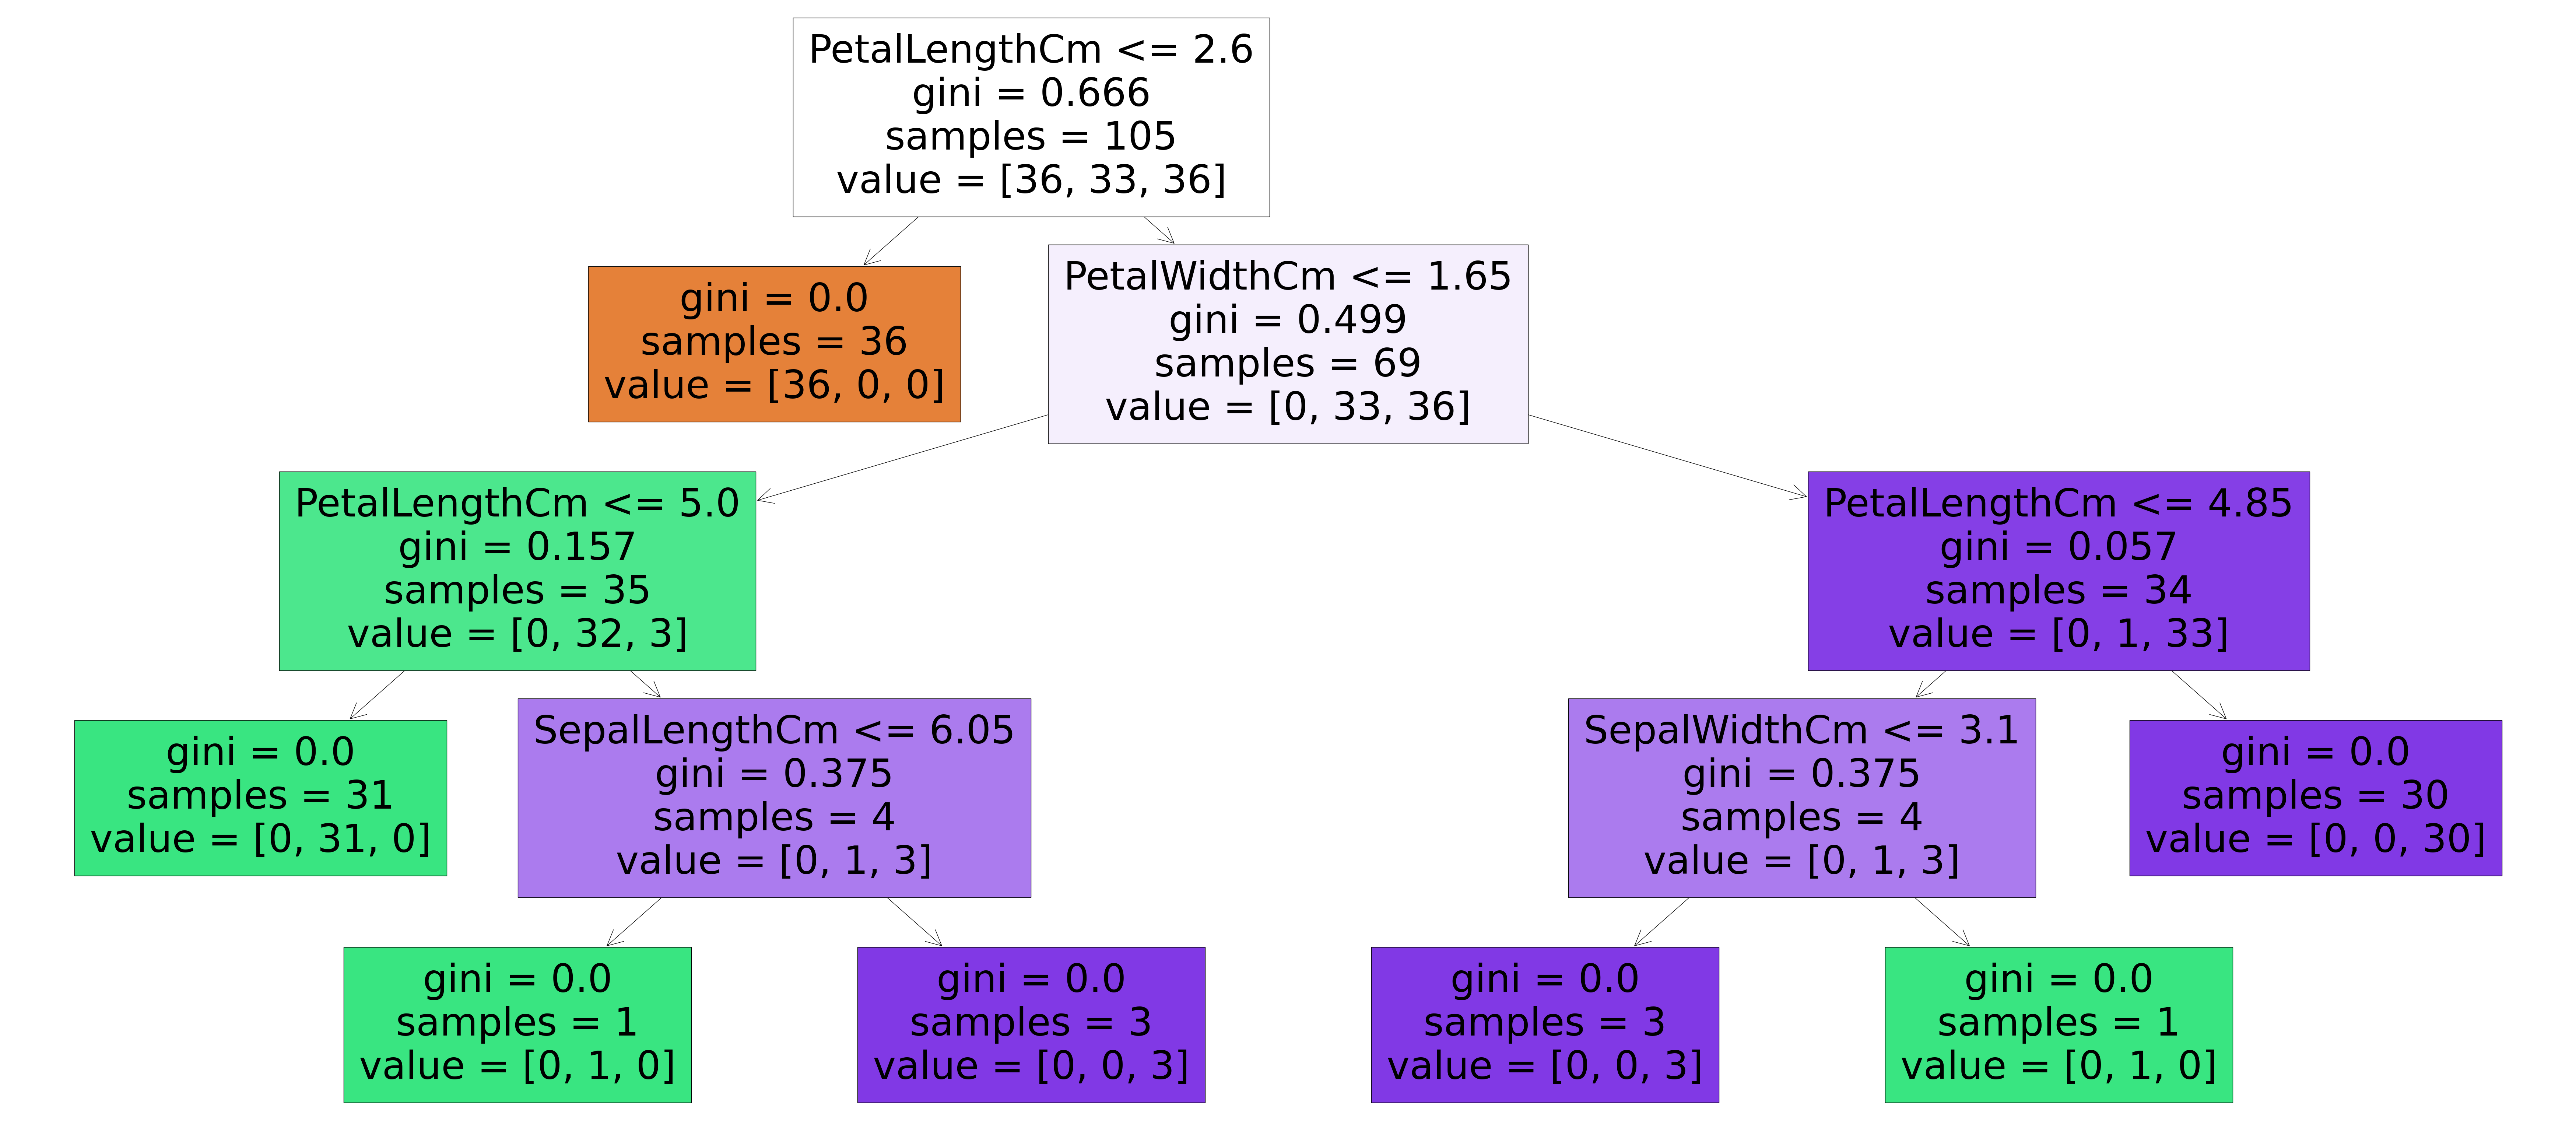

In [16]:
plt.figure(figsize=(90,40))
plot_tree(classifier, feature_names=data_set.iloc[:,:-1].columns, filled=True)
plt.show()

No handles with labels found to put in legend.


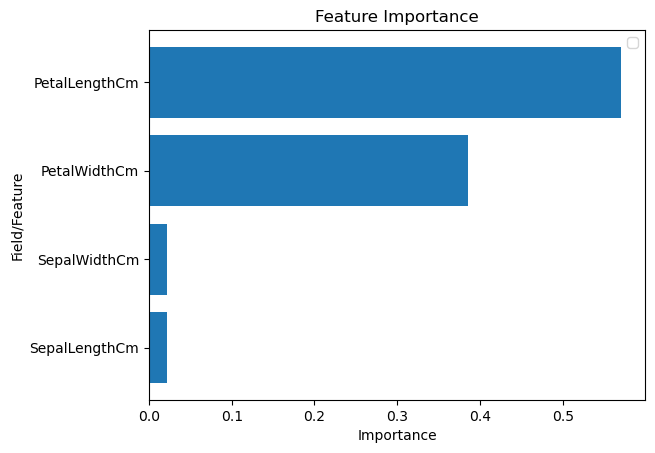

In [17]:
# Feature Importance Graph
K = pd.Series(data = classifier.feature_importances_, index = data_set.iloc[:,:-1].columns)
K = K.sort_values()

plt.barh(K.index, K)
plt.title("Feature Importance")
plt.ylabel("Field/Feature")
plt.xlabel("Importance")
plt.legend()
plt.show()

## **6.** Making Predictions

In [18]:
data = input("Enter the Sepal Length Sepal width petal legth petal width of Flower in cm seperated by ','")
data = data.split(',')

print(data)
pred = classifier.predict([data])[0]
print(f"Flower is {pred} and probabilty is {classifier.predict_proba([data])[0][[list(classifier.classes_).index(pred)]][0]}")

['6.3', '2.3', '4.4', '1.3']
Flower is Iris-versicolor and probabilty is 1.0
